## Visualize data for US election


#### Data 

Initially i see the data at [usda/county-level-data-sets | data.world](https://data.world/usda/county-level-data-sets), originally from [USDA ERS - County-level Data Sets](http://www.ers.usda.gov/data-products/county-level-data-sets.aspx) in :

- [Education.xls](http://www.ers.usda.gov/webdocs/DataFiles/CountyLevel_Data_Sets_Download_Data__18026//Education.xls)
- [PovertyEstimates.xls](http://www.ers.usda.gov/webdocs/DataFiles/CountyLevel_Data_Sets_Download_Data__18026//PovertyEstimates.xls)
- [Unemployment.xls](http://www.ers.usda.gov/webdocs/DataFiles/CountyLevel_Data_Sets_Download_Data__18026//Unemployment.xls)
- [PopulationEstimates.xls](http://www.ers.usda.gov/webdocs/DataFiles/CountyLevel_Data_Sets_Download_Data__18026//PopulationEstimates.xls)

#### Useful links

- [Mapping the U.S. Census population estimates for incorporated places with CartoDB and geopandas](http://blog.danwin.com/census-places-cartodb-geopandas-mapping/)

- [GeoJSON and KML data for the United States](http://eric.clst.org/Stuff/USGeoJSON)


In [2]:
# %load https://gist.githubusercontent.com/kidpixo/2ec078d09834b5aa7869/raw/350f79fe4f2e09592404a76db18dcc01a961444b/ipython_inizialization.py
import pandas as pd
import numpy as np

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
# from http://code.activestate.com/recipes/577305-python-dictionary-of-us-states-and-territories/
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}


In [9]:
import geopandas as gpd

In [69]:
# files from [GeoJSON and KML data for the United States](http://eric.clst.org/Stuff/USGeoJSON)
fname = "gz_2010_us_040_00_20m.json"
df = gpd.read_file(fname)
df.head()

,CENSUSAREA,GEO_ID,LSAD,NAME,STATE,geometry
0,113594.084,0400000US04,,Arizona,04,"POLYGON ((-112.538593 37.000674, -112.534545 3..."
1,52035.477,0400000US05,,Arkansas,05,"POLYGON ((-94.042964 33.019219, -94.043036 33...."
2,155779.220,0400000US06,,California,06,"(POLYGON ((-120.248484 33.999329, -120.247393 ..."
3,103641.888,0400000US08,,Colorado,08,"POLYGON ((-107.317794 41.002957, -107.000606 4..."
4,4842.355,0400000US09,,Connecticut,09,"POLYGON ((-72.397428 42.033302, -72.1988280000..."


In [26]:
geodf = gpd.GeoDataFrame(df)
# see [Managing Projections — GeoPandas 0.2-py3.5.egg documentation](http://geopandas.org/projections.html)
geodf.crs =  {'init': 'epsg:4326'}

In [30]:
geodf.index = geodf.NAME

In [31]:
geodf.head()

,CENSUSAREA,GEO_ID,LSAD,NAME,STATE,geometry
NAME,,,,,,
Arizona,113594.084,0400000US04,,Arizona,04,"POLYGON ((-112.538593 37.000674, -112.534545 3..."
Arkansas,52035.477,0400000US05,,Arkansas,05,"POLYGON ((-94.042964 33.019219, -94.043036 33...."
California,155779.220,0400000US06,,California,06,"(POLYGON ((-120.248484 33.999329, -120.247393 ..."
Colorado,103641.888,0400000US08,,Colorado,08,"POLYGON ((-107.317794 41.002957, -107.000606 4..."
Connecticut,4842.355,0400000US09,,Connecticut,09,"POLYGON ((-72.397428 42.033302, -72.1988280000..."


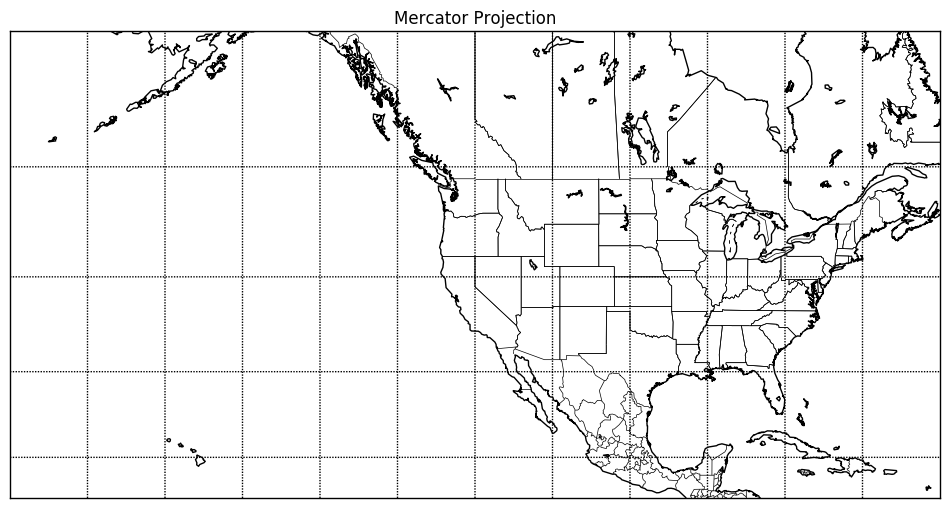

In [512]:
from mpl_toolkits.basemap import Basemap

fig, ax1 = plt.subplots(figsize=(12, 10))

m = Basemap(projection='merc',llcrnrlat=15,urcrnrlat=60,\
            llcrnrlon=-180,urcrnrlon=-60,lat_ts=0,resolution='l')
m.drawcoastlines()
m.drawstates()
m.drawcountries()
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,10.))
m.drawmeridians(np.arange(-180.,181.,10.))
m.drawmapboundary()
plt.title("Mercator Projection")

# see https://borealperspectives.wordpress.com/2016/03/07/plotting-polygon-shapefiles-on-a-matplotlib-basemap-with-geopandas-shapely-and-descartes/


# states_bm = ax1.add_collection(
#     PatchCollection(patches, match_original=True))

# g = geodf.plot(ax=m)

In [523]:
geodf.to_crs({'init': 'epsg:3395'}).head()

,CENSUSAREA,GEO_ID,LSAD,NAME,STATE,geometry
NAME,,,,,,
Arizona,113594.084,0400000US04,,Arizona,04,POLYGON ((-12527738.86735146 4413483.433902421...
Arkansas,52035.477,0400000US05,,Arkansas,05,POLYGON ((-10468814.86517016 3874572.977355877...
California,155779.220,0400000US06,,California,06,(POLYGON ((-13386000.00754311 4004819.42635271...
Colorado,103641.888,0400000US08,,Colorado,08,"POLYGON ((-11946562.18113743 4984737.01798218,..."
Connecticut,4842.355,0400000US09,,Connecticut,09,POLYGON ((-8059244.819702687 5137351.819036761...


In [22]:
g = geodf.plot(figsize=[10,8])
g.set_xlim([-180,-60])
g.set_ylim([15,75])

NameError: name 'geodf' is not defined

In [530]:
# see https://borealperspectives.wordpress.com/2016/03/07/plotting-polygon-shapefiles-on-a-matplotlib-basemap-with-geopandas-shapely-and-descartes/

import shapely
from descartes import PolygonPatch

patches = []
for poly in geodf.geometry:
    print poly.geom_type
    if poly.geom_type == 'Polygon':
        mpoly = shapely.ops.transform(m, poly)
        patches.append(PolygonPatch(mpoly))
    elif poly.geom_type == 'MultiPolygon':
        for subpoly in poly:
            mpoly = shapely.ops.transform(m, poly)
            patches.append(PolygonPatch(mpoly))
    else:
        print(poly, "is neither a polygon nor a multi-polygon. Skipping it.")


Polygon
Polygon
MultiPolygon


AssertionError: 

In [14]:
# grab the dato directly from www.ers.usda.gov
url="http://www.ers.usda.gov/webdocs/DataFiles/CountyLevel_Data_Sets_Download_Data__18026//Education.xls"

edu = pd.read_excel(url, skiprows=3, header=1)
edu.drop(0, axis=0,inplace=True, errors='raise') # drop global data for US
edu['NAME'] = edu.State.apply(lambda x: states[x]) # create an expanded NAME columns
edu.head(2)

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,NAME
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,1062306.0,468269.0,136287.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alabama
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,6611.0,3757.0,933.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alabama


In [7]:
# grab the dato directly from www.ers.usda.gov
url="http://www.ers.usda.gov/webdocs/DataFiles/CountyLevel_Data_Sets_Download_Data__18026//Unemployment.xls"

une = pd.read_excel(url, skiprows=5, header=1)
une.head(2)

,FIPS_Code,State,Area_name,Rural_urban_continuum_code_2003,Urban_influence_code_2003,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,...,Civilian_labor_force_2014,Employed_2014,Unemployed_2014,Unemployment_rate_2014,Civilian_labor_force_2015,Employed_2015,Unemployed_2015,Unemployment_rate_2015,Median_Household_Income_2014,Med_HH_Income_Percent_of_State_Total_2014
0,1000,AL,Alabama,NaN,NaN,NaN,NaN,2175612.0,2089127.0,86485.0,...,2161313.0,2014284.0,147029.0,6.8,2146157.0,2015189.0,130968.0,6.1,42917.0,100.0
1,1001,AL,"Autauga County, AL",2.0,2.0,2.0,2.0,24383.0,23577.0,806.0,...,25597.0,24097.0,1500.0,5.9,25308.0,23981.0,1327.0,5.2,54366.0,126.7


In [434]:
# aggregate states
edu_state = edu.groupby('State').mean()
une_state = une.groupby('State').mean()

In [436]:
edu_state.head(2)

,FIPS Code,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970",...,"Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2010-2014","High school diploma only, 2010-2014","Some college or associate's degree, 2010-2014","Bachelor's degree or higher, 2010-2014","Percent of adults with less than a high school diploma, 2010-2014","Percent of adults with a high school diploma only, 2010-2014","Percent of adults completing some college or associate's degree, 2010-2014","Percent of adults with a bachelor's degree or higher, 2010-2014"
State,,,,,,,,,,,,,,,,,,,,,
AK,2157.189189,7.259259,9.407407,7.586207,10.034483,3461.076923,3909.230769,1542.461538,1467.846154,49.026923,...,30.760714,18.778571,2513.333333,8440.733333,11238.000000,8495.866667,10.884489,33.187889,34.371947,21.555676
AL,1066.014706,4.805970,4.477612,4.641791,4.388060,31244.294118,13772.617647,4008.441176,4174.588235,65.158824,...,23.360294,13.570588,15422.588235,29404.735294,27998.823529,21818.029412,20.370382,35.230706,27.998969,16.399943


In [440]:
une_state.head(2)

,FIPS_Code,Rural_urban_continuum_code_2003,Urban_influence_code_2003,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,Civilian_labor_force_2008,...,Civilian_labor_force_2014,Employed_2014,Unemployed_2014,Unemployment_rate_2014,Civilian_labor_force_2015,Employed_2015,Unemployed_2015,Unemployment_rate_2015,Median_Household_Income_2014,Med_HH_Income_Percent_of_State_Total_2014
State,,,,,,,,,,,,,,,,,,,,,
AK,2156.558824,7.321429,9.500000,7.633333,10.10000,25056.107143,23469.928571,1586.178571,8.353571,25436.428571,...,24392.766667,22720.333333,1672.433333,10.230000,24254.666667,22681.800000,1572.866667,9.410,59583.000000,84.045161
AL,1066.014706,4.805970,4.477612,4.641791,4.38806,63988.617647,61444.970588,2543.647059,4.886765,64014.411765,...,63568.132353,59243.676471,4324.455882,7.907353,63122.470588,59270.382353,3852.088235,7.025,38627.014706,90.001471


In [450]:
census_state = pd.merge(edu_state,  une_state, left_index=True, right_index=True)
census_state['State'] = census_state.index
census_state['NAME']  = census_state.State.apply(lambda x: states[x]) # create an expanded NAME columns
census_state.index = census_state['NAME']
census_state.drop(['State','NAME'],axis=1, inplace=True)
census_state.head(2)

,FIPS Code,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970",...,Civilian_labor_force_2014,Employed_2014,Unemployed_2014,Unemployment_rate_2014,Civilian_labor_force_2015,Employed_2015,Unemployed_2015,Unemployment_rate_2015,Median_Household_Income_2014,Med_HH_Income_Percent_of_State_Total_2014
NAME,,,,,,,,,,,,,,,,,,,,,
Alaska,2157.189189,7.259259,9.407407,7.586207,10.034483,3461.076923,3909.230769,1542.461538,1467.846154,49.026923,...,24392.766667,22720.333333,1672.433333,10.230000,24254.666667,22681.800000,1572.866667,9.410,59583.000000,84.045161
Alabama,1066.014706,4.805970,4.477612,4.641791,4.388060,31244.294118,13772.617647,4008.441176,4174.588235,65.158824,...,63568.132353,59243.676471,4324.455882,7.907353,63122.470588,59270.382353,3852.088235,7.025,38627.014706,90.001471


In [452]:
geo_edu = pd.merge(geodf, census_state, left_index=True, right_index=True)
geo_edu.columns

Index([                                                                u'CENSUSAREA',
                                                                           u'GEO_ID',
                                                                             u'LSAD',
                                                                             u'NAME',
                                                                            u'STATE',
                                                                         u'geometry',
                                                                        u'FIPS Code',
                                                  u'2003 Rural-urban Continuum Code',
                                                        u'2003 Urban Influence Code',
                                                  u'2013 Rural-urban Continuum Code',
                                                        u'2013 Urban Influence Code',
                                            u'Less tha

35708.6144578 72127.6818182
NAME
Alaska                  59583.000000
Alabama                 38627.014706
Arkansas                37627.381579
Arizona                 43493.687500
California              56149.084746
Colorado                52539.169231
Connecticut             70370.000000
District of Columbia    69992.000000
Delaware                58018.000000
Florida                 44134.750000
Georgia                 41260.631250
Hawaii                  63844.000000
Iowa                    51728.440000
Idaho                   45811.844444
Illinois                51015.660194
Indiana                 49448.645161
Kansas                  48876.886792
Kentucky                39713.884298
Louisiana               41751.707692
Massachusetts           65586.733333
Maryland                67533.160000
Maine                   45794.058824
Michigan                45003.023810
Minnesota               54600.488636
Missouri                41580.956897
Mississippi             35708.614458
Monta

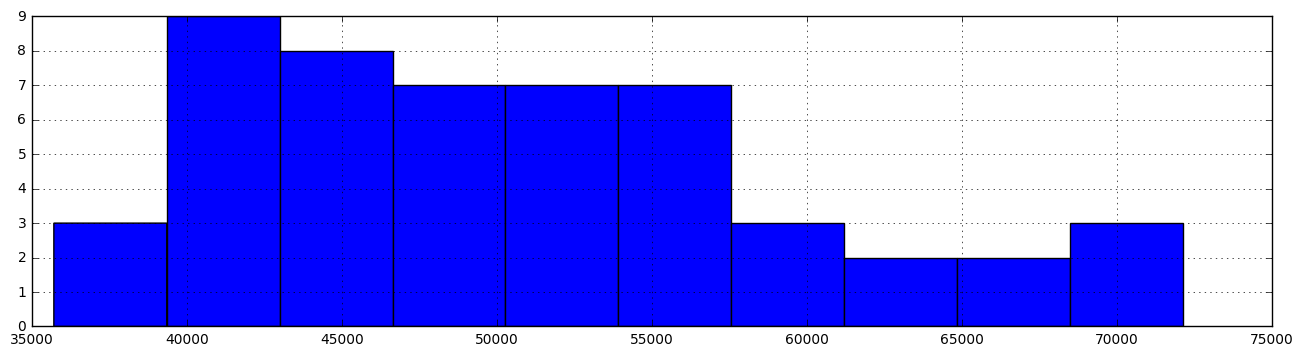

In [577]:
col = u'Median_Household_Income_2014'
print geo_edu[col].min(), geo_edu[col].max()
print geo_edu[col]
geo_edu[col].hist(figsize=[16,4])

4.55277299931 4.8581019742
35708.6144578 72127.6818182
[ 0.125  0.125  0.9    0.9  ]
[0.92500000000000004, 0.125, 0.05, 0.77500000000000002]


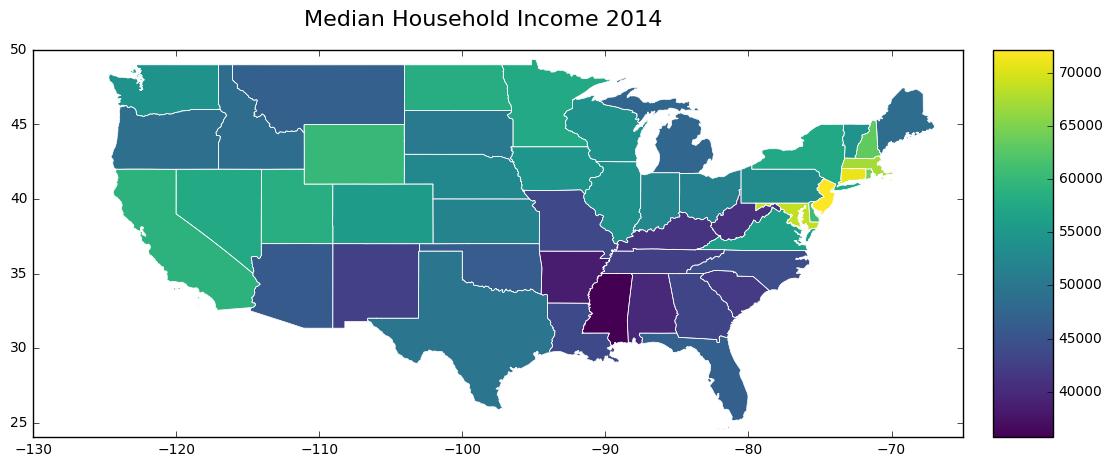

In [583]:
geo_edu['color'] = geo_edu[col].apply(np.log10)

cmap = 'viridis'
vmin = geo_edu['color'].min()
vmax = geo_edu['color'].max()
cbar_vmin = geo_edu[col].min()
cbar_vmax = geo_edu[col].max()

print vmin, vmax
print cbar_vmin, cbar_vmax

fig, ax = plt.subplots(1,1,figsize=[12,5])

g = geo_edu.plot(column='color',cmap=cmap, edgecolor='white',
                 linewidth = 0.5,vmin=vmin, vmax=vmax, ax=ax, alpha=1)
g.set_xlim([-130,-65])
g.set_ylim([24,50])

# add colorbar
# fig = g.get_figure()

axbb = np.array(ax.get_position()).flatten()

shift = 0.025
cbar_width = 0.05
print axbb
print [axbb[3]+shift,axbb[1],cbar_width,axbb[3]-axbb[1]]

cax = fig.add_axes([axbb[3]+shift,axbb[1],cbar_width,axbb[3]-axbb[1]])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=cbar_vmin, vmax=cbar_vmax))
# fake up the array of the scalar mappable. Urgh...
sm._A = []
fig.colorbar(sm, cax=cax)

fig.suptitle(col.replace('_', ' '), fontsize=16)

Screenshot from [2016 Election Results: President Live Map by State, Real-Time Voting Updates - POLITICO](http://www.politico.com/2016-election/results/map/president)

![2016_Election_Results](2016_Election_Results.png)